In [51]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [52]:
import numpy as np
import h5py
from ast import literal_eval
from chainconsumer import ChainConsumer
#from corner import corner

In [53]:
%%bash
ls /u/ki/swmclau2/des/SherlockPearceMCMC/*.hdf5 -sh

110M /u/ki/swmclau2/des/SherlockPearceMCMC/pearce_mcmc_joint_ind.hdf5
 57M /u/ki/swmclau2/des/SherlockPearceMCMC/test_mcmc.hdf5


In [54]:
fname = '/u/ki/swmclau2/des/SherlockPearceMCMC/pearce_mcmc_joint_ind.hdf5'

In [55]:
f = h5py.File(fname, 'r')

In [56]:
f.attrs.keys()

[u'emu_type',
 u'training_file',
 u'fixed_params',
 u'emu_hps',
 u'sim',
 u'obs',
 u'cov',
 u'nwalkers',
 u'nsteps',
 u'nburn',
 u'seed',
 u'chain_fixed_params',
 u'param_names']

In [57]:
n_walkers = f.attrs['nwalkers']
n_steps = f.attrs['nsteps']
n_burn = 10000#f.attrs['nburn']

In [58]:
chain_param_names = f.attrs['param_names']

In [59]:
chain = f['chain'].value
chain = chain[:n_burn*n_walkers, :]

In [60]:
#n_walkers = 500
n_params = chain.shape[1] if len(chain.shape) > 1 else 1

In [61]:
MAP = chain.mean(axis = 0)
print MAP

[ 2.27663741e-02  1.19483836e-01 -9.99268591e-01  9.85772908e-01
  3.02184725e+00  6.68004074e+01  3.48601604e+00  1.42968063e+01
  1.65169999e-01  1.33290586e+01  9.95123625e-01]


In [62]:
chain_param_names

array(['ombh2', 'omch2', 'w0', 'ns', 'ln10As', 'H0', 'Neff', 'logM0',
       'sigma_logM', 'logM1', 'alpha'], dtype='|S10')

In [63]:
param_names = [r'$\Omega_b h^2$', r'$\Omega_c h^2$', r'$w_0$',  r'$n_s$', r'$\ln(10A_s)$', r'$H_0$',  r'$N_{eff}$',\
               r'$\log(M_0)$',  r'$\sigma_{\log M }$', r'$\log(M_1)$',  r'$\alpha$']

In [64]:
hod_param_names = param_names[7:]
cosmo_param_names = param_names[:7]

In [65]:
c = ChainConsumer()
c.add_chain(chain, walkers=n_walkers, parameters = param_names)
c.configure(statistics='cumulative')

In [66]:
sim_info = literal_eval(f.attrs['sim'])

In [67]:
sim_info

{'cosmo_params': {'H0': 63.2317,
  'Neff': 2.95,
  'ln10As': 3.03895,
  'ns': 0.9805149999999999,
  'ombh2': 0.023262900000000003,
  'omch2': 0.10783,
  'w0': -0.726513},
 'gal_type': 'HOD',
 'hod_name': 'zheng07',
 'hod_params': {'alpha': 1.083,
  'logM0': 14.0,
  'logM1': 13.7,
  'logMmin': 13.152866508173869,
  'sigma_logM': 0.2},
 'nd': '1e-4',
 'scale_factor': 1.0,
 'sim_hps': {'boxno': 0,
  'downsample_factor': '1e-2',
  'particles': True,
  'realization': 1,
  'system': 'sherlock'},
 'simname': 'testbox'}

In [68]:
cosmo_true_vals = [sim_info['cosmo_params'][key] for key in chain_param_names if key in sim_info['cosmo_params']]

In [69]:
hod_true_vals = [sim_info['hod_params'][key] for key in chain_param_names if key in sim_info['hod_params']]

/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


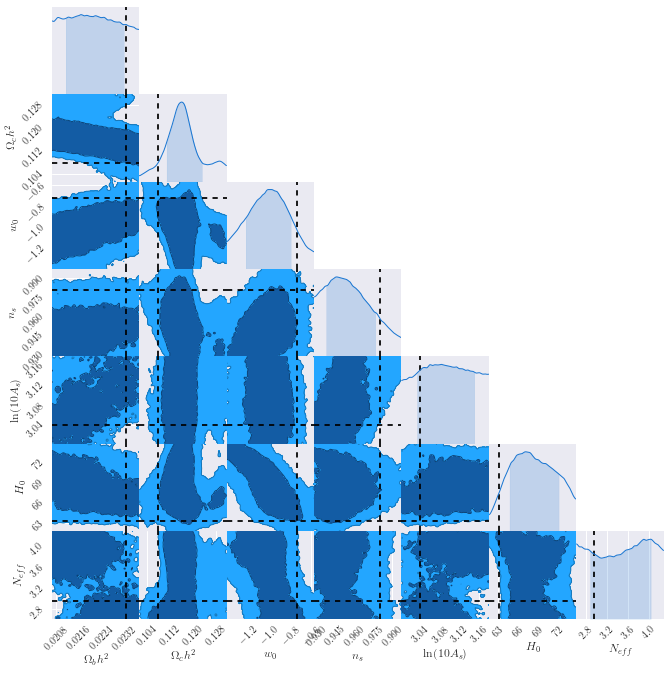

In [70]:
fig = c.plotter.plot(figsize=(10,10), parameters = cosmo_param_names, truth = cosmo_true_vals)# parameters = [param_names[i] for i in (1, 4)])
                    #, truth = true_vals)
fig.show()

/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


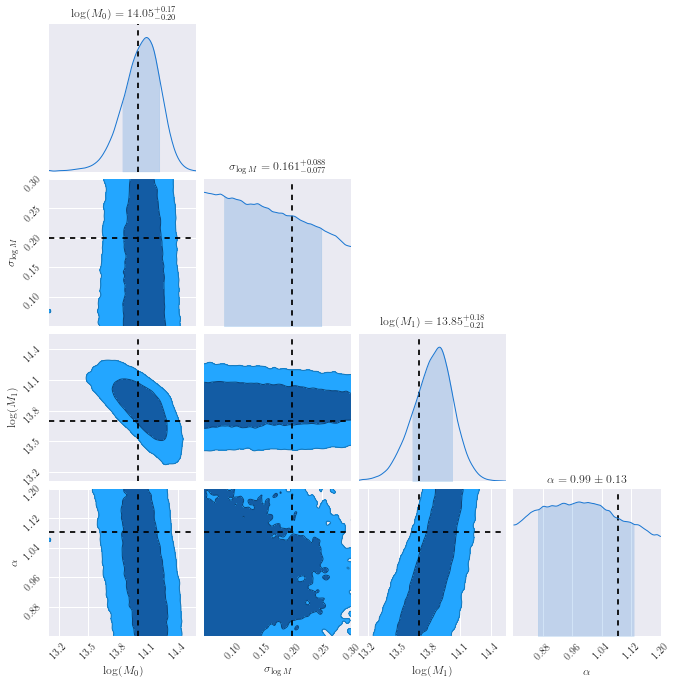

In [71]:
fig = c.plotter.plot(figsize=(10,10), parameters = hod_param_names, truth = hod_true_vals)# parameters = [param_names[i] for i in (1, 4)])
                    #, truth = true_vals)
fig.show()

/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


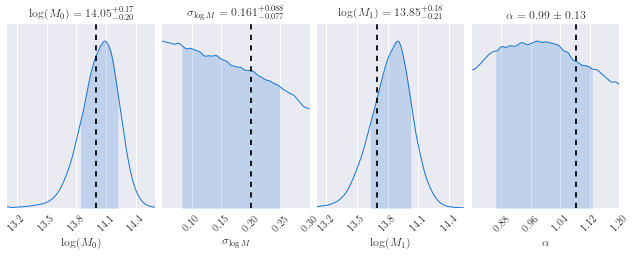

In [72]:
#c.configure(statistics='max')
fig = c.plotter.plot_distributions(figsize=(10, 3) ,parameters = hod_param_names, truth = hod_true_vals)
fig.show()

/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


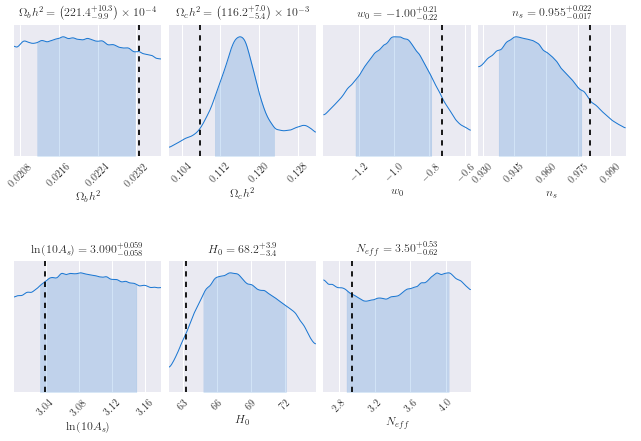

In [73]:
#c.configure(statistics='max')
fig = c.plotter.plot_distributions(figsize=(10, 6) , parameters = cosmo_param_names, truth = cosmo_true_vals)
fig.show()

In [74]:
gelman_rubin_converged = c.diagnostic.gelman_rubin()
print gelman_rubin_converged

Gelman-Rubin Statistic values for chain Chain 0
$\Omega_b h^2$: 1.22669 (Failed)
$\Omega_c h^2$: 1.09519 (Failed)
$w_0$: 1.00079 (Passed)
$n_s$: 1.94328 (Failed)
$\ln(10A_s)$: 1.70169 (Failed)
$H_0$: 1.10931 (Failed)
$N_{eff}$: 1.00102 (Passed)
$\log(M_0)$: 1.71535 (Failed)
$\sigma_{\log M }$: 1.00115 (Passed)
$\log(M_1)$: 2.75609 (Failed)
$\alpha$: 1.00077 (Passed)
False


In [75]:
np.sqrt(np.diag(c.analysis.get_covariance()[1]))

array([8.64823660e-04, 6.36693619e-03, 1.97324602e-01, 1.76006831e-02,
       5.01858793e-02, 3.25736406e+00, 4.86258079e-01, 1.92900837e-01,
       7.08248257e-02, 1.96720480e-01, 1.11704441e-01])

In [76]:
summary  = c.analysis.get_summary()
for key, val in summary.iteritems():
    print key, val[1]

$\log(M_0)$ 14.045326538712182
$\ln(10A_s)$ 3.090380140239185
$\alpha$ 0.9922827961971149
$n_s$ 0.9547472607058617
$\Omega_c h^2$ 0.11615904764207864
$w_0$ -0.9973664827286205
$N_{eff}$ 3.501507179620077
$\sigma_{\log M }$ 0.16100881295987013
$\Omega_b h^2$ 0.022140252088814608
$H_0$ 68.21413498714989
$\log(M_1)$ 13.846347203613801


In [77]:
MAP = np.array([summary[p][1] for p in param_names])
print MAP

[ 2.21402521e-02  1.16159048e-01 -9.97366483e-01  9.54747261e-01
  3.09038014e+00  6.82141350e+01  3.50150718e+00  1.40453265e+01
  1.61008813e-01  1.38463472e+01  9.92282796e-01]


In [78]:
print param_names

['$\\Omega_b h^2$', '$\\Omega_c h^2$', '$w_0$', '$n_s$', '$\\ln(10A_s)$', '$H_0$', '$N_{eff}$', '$\\log(M_0)$', '$\\sigma_{\\log M }$', '$\\log(M_1)$', '$\\alpha$']
